In [1]:
import matplotlib
import pandas as pd
import numpy as np
import csv
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/Dataset_GlobalClass.csv', sep="\t")
df.head()

,Lead Protein ID,Global classifier2,Sequence
0,Q9BZC7,Mostly Organellar,MGFLHQLQLLLWKNVTLKRRSPWVLAFEIFIPLVLFFILLGLRQKK...
1,Q6RW13,Organellar and Cytosolic,MELPAVNLKVILLGHWLLTTWGCIVFSGSYAWANFTILALGVWAVA...
2,Q9P2R3,Mostly Cytosolic,MAEEEVAKLEKHLMLLRQEYVKLQKKLAETEKRCALLAAQANKESS...
3,Q96NW4,Organellar and Cytosolic,MALYDEDLLKNPFYLALQKCRPDLCSKVAQIHGIVLVPCKGSLSSS...
4,O00203,Organellar and Cytosolic,MSSNSFPYNEQSGGGEATELGQEATSTISPSGAFGLFSSDLKKNED...


In [3]:
df.shape

(8710, 3)

In [4]:
lengh_seq = []
for seq in df["Sequence"]:
    lengh_seq.append(len(seq))
lengh_seq = np.asarray(lengh_seq)
df["Sequence Lengh"] = lengh_seq

In [5]:
df.head()

,Lead Protein ID,Global classifier2,Sequence,Sequence Lengh
0,Q9BZC7,Mostly Organellar,MGFLHQLQLLLWKNVTLKRRSPWVLAFEIFIPLVLFFILLGLRQKK...,2435
1,Q6RW13,Organellar and Cytosolic,MELPAVNLKVILLGHWLLTTWGCIVFSGSYAWANFTILALGVWAVA...,159
2,Q9P2R3,Mostly Cytosolic,MAEEEVAKLEKHLMLLRQEYVKLQKKLAETEKRCALLAAQANKESS...,1169
3,Q96NW4,Organellar and Cytosolic,MALYDEDLLKNPFYLALQKCRPDLCSKVAQIHGIVLVPCKGSLSSS...,1050
4,O00203,Organellar and Cytosolic,MSSNSFPYNEQSGGGEATELGQEATSTISPSGAFGLFSSDLKKNED...,1094


In [6]:
indexNames = df[ df['Sequence Lengh'] > 1500 ].index
 
# Delete these row indexes from dataFrame
df_short = df.drop(indexNames , inplace=False).reset_index(drop=True)
df_short.head()

,Lead Protein ID,Global classifier2,Sequence,Sequence Lengh
0,Q6RW13,Organellar and Cytosolic,MELPAVNLKVILLGHWLLTTWGCIVFSGSYAWANFTILALGVWAVA...,159
1,Q9P2R3,Mostly Cytosolic,MAEEEVAKLEKHLMLLRQEYVKLQKKLAETEKRCALLAAQANKESS...,1169
2,Q96NW4,Organellar and Cytosolic,MALYDEDLLKNPFYLALQKCRPDLCSKVAQIHGIVLVPCKGSLSSS...,1050
3,O00203,Organellar and Cytosolic,MSSNSFPYNEQSGGGEATELGQEATSTISPSGAFGLFSSDLKKNED...,1094
4,O14617,Organellar and Cytosolic,MALKMVKGSIDRMFDKNLQDLVRGIRNHKEDEAKYISQCIDEIKQE...,1153


In [16]:
df_short.shape

(8161, 4)

In [7]:
df_short.groupby(["Global classifier2"]).count()
# I will remove all the No Prediction rows

,Lead Protein ID,Sequence,Sequence Lengh
Global classifier2,,,
Broad distribution,812,812,812
Mostly Cytosolic,1919,1919,1919
Mostly Nuclear,1006,1006,1006
Mostly Organellar,2633,2633,2633
Nuclear and Cytosolic,630,630,630
Organellar and Cytosolic,1161,1161,1161


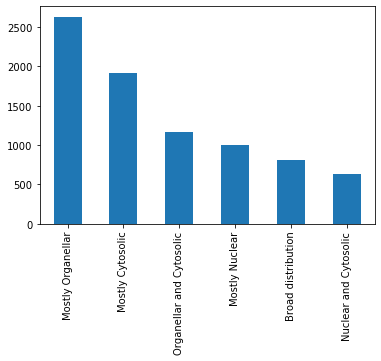

In [8]:
df_short['Global classifier2'].value_counts().plot.bar()

## Splitting Dataset

In [8]:
# Stratified Sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
for train_index, test_index in split.split(df_short, df_short["Global classifier2"]):
    train_set = df_short.loc[train_index]
    test_set = df_short.loc[test_index]

In [9]:
train_set["Global classifier2"].value_counts() / len(train_set) *100

Mostly Organellar           32.266436
Mostly Cytosolic            23.514994
Organellar and Cytosolic    14.230104
Mostly Nuclear              12.326990
Broad distribution           9.948097
Nuclear and Cytosolic        7.713379
Name: Global classifier2, dtype: float64

In [10]:
test_set["Global classifier2"].value_counts() / len(test_set) *100

Mostly Organellar           32.244898
Mostly Cytosolic            23.510204
Organellar and Cytosolic    14.204082
Mostly Nuclear              12.326531
Broad distribution           9.959184
Nuclear and Cytosolic        7.755102
Name: Global classifier2, dtype: float64

In [11]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
for train_index, valid_index in split.split(train_set, train_set["Global classifier2"]):
    train = df_short.loc[train_index]
    valid = df_short.loc[valid_index]

In [13]:
train.shape

(5895, 4)

In [14]:
valid.shape

(1041, 4)

In [15]:
test_set.shape

(1225, 4)

In [12]:
train.to_csv(path_or_buf= "data/globalClasses_train.csv", sep="\t", index=False)
valid.to_csv(path_or_buf= "data/globalClasses_valid.csv", sep="\t", index=False)
test_set.to_csv(path_or_buf="data/globalClasses_test.csv", sep="\t", index=False)

## Make a 3 classes dataset

In [13]:
df_3classes = df_short[df_short["Global classifier2"] != 'Organellar and Cytosolic'].reset_index(drop=True)
df_3classes = df_3classes[df_3classes["Global classifier2"] != 'Broad distribution'].reset_index(drop=True)
df_3classes = df_3classes[df_3classes["Global classifier2"] != 'Nuclear and Cytosolic'].reset_index(drop=True)

In [18]:
df_3classes

,Lead Protein ID,Global classifier2,Sequence,Sequence Lengh
0,Q9P2R3,Mostly Cytosolic,MAEEEVAKLEKHLMLLRQEYVKLQKKLAETEKRCALLAAQANKESS...,1169
1,Q96BM9,Mostly Organellar,MIALFNKLLDWFKALFWKEEMELTLVGLQYSGKTTFVNVIASGQFN...,186
2,Q93050,Mostly Organellar,MGELFRSEEMTLAQLFLQSEAAYCCVSELGELGKVQFRDLNPDVNV...,837
3,Q9HBG4,Mostly Organellar,MVSVFRSEEMCLSQLFLQVEAAYCCVAELGELGLVQFKDLNMNVNS...,840
4,P61421,Mostly Organellar,MSFFPELYFNVDNGYLEGLVRGLKAGVLSQADYLNLVQCETLEDLK...,351
...,...,...,...,...
5553,Q96LW9,Mostly Nuclear,MASTEEQYDLKIVKVEEDPIWDQETHLRGNNFSGQEASRQLFRQFC...,406
5554,Q9H900,Mostly Cytosolic,MWERLNCAAEDFYSRLLQKFNEEKKGIRKDPFLYEADVQVQLISKG...,591
5555,O95229,Mostly Cytosolic,MEAAETEAEAAALEVLAEVAGILEPVGLQEEAELPAKILVEFVVDS...,277
5556,Q2QGD7,Mostly Nuclear,MDLPALLPAPTARGGQHGGGPGPLRRAPAPLGASPARRRLLLVRGP...,858


In [14]:
df_3classes["Global classifier2"].value_counts() / len(df_3classes) *100

Mostly Organellar    47.373156
Mostly Cytosolic     34.526808
Mostly Nuclear       18.100036
Name: Global classifier2, dtype: float64

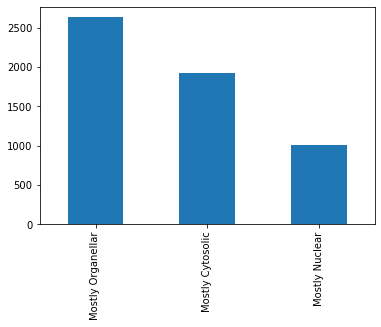

In [15]:
df_3classes['Global classifier2'].value_counts().plot.bar()

In [17]:
df_3classes.shape

(5558, 4)

In [20]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.15, random_state=42)
for train_i, test_i in split.split(df_3classes, df_3classes["Global classifier2"]):
    train_3C = df_3classes.loc[train_i]
    test_3C = df_3classes.loc[test_i]

In [21]:
train_3C = train_3C.reset_index(drop=True)

In [22]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
for train_index, valid_index in split.split(train_3C, train_3C["Global classifier2"]):
    train_3C_2 = train_3C.loc[train_index]
    valid_3C = train_3C.loc[valid_index]

In [23]:
train_3C_2["Global classifier2"].value_counts() / len(train_3C_2) *100

Mostly Organellar    47.372354
Mostly Cytosolic     34.520548
Mostly Nuclear       18.107098
Name: Global classifier2, dtype: float64

In [24]:
test_3C["Global classifier2"].value_counts() / len(test_3C) *100

Mostly Organellar    47.362110
Mostly Cytosolic     34.532374
Mostly Nuclear       18.105516
Name: Global classifier2, dtype: float64

In [25]:
valid_3C["Global classifier2"].value_counts() / len(valid_3C) *100

Mostly Organellar    47.390691
Mostly Cytosolic     34.555712
Mostly Nuclear       18.053597
Name: Global classifier2, dtype: float64

In [58]:
train_3C_2.to_csv(path_or_buf= "data/3Classes_train.csv", sep="\t", index=False)
valid_3C.to_csv(path_or_buf= "data/3Classes_valid.csv", sep="\t", index=False)
test_3C.to_csv(path_or_buf="data/3Classes_test.csv", sep="\t", index=False)